In [163]:
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings("ignore")

In [ ]:
txt = open('/content/brexit_ru.txt_file_1000.txt')
txt.readlines()

['ru-1000\n',
 'ru\n',
 '2018-07-09\n',
 'http://news.meta.ua/ua/cluster:60407124-Boris-Dzhonson-podal-v-otstavku-s-posta-ministra-inostrannykh-del-Velikobritanii/\n',
 'Подробности.ua: Третий за сутки: Борис Джонсон покинул пост министра иностранных дел Великобритании\n',
 '\n',
 'Таким образом, Джонсон стал третьим министром, который покинул свой пост в течении суток. Раннее о своем уходе объявили министр по вопросам выхода Великобритании из ЕС Дэвид Дэвис и заместитель министра по Brexit Стив Бейкер. Напомним, ранее премьер-министр Великобритании Тереза Мэй пообещала отправить в отставку главу МИД Соединенного Королевства Бориса Джонсона, если он попытается ослабить согласованную ее кабинетом коллективную позицию относительно будущих переговоров с ЕС.\n',
 '\n',
 'Об этом сообщает The Guardian, передает УНН. "Сегодня днем премьер-министр принял отставку Бориса Джонсона с поста качестве министра иностранных дел. Его замена будет объявлена в ближайшее время. Премьер-министр благодарит

In [ ]:
file_path = '/content/brexit_ru.txt_file_1001.out'
df = pd.read_csv(file_path, sep='\t')
print(df.head())

                                                      ru-1001
Associated Press NaN            ORG  ORG-The-Associated-Press
Brexit           Brexit         EVT                EVT-Brexit
Борис Джонсон    Борис Джонсон  PER         PER-Boris-Johnson
Бориса           Борис          PER         PER-Boris-Johnson
Великобритании   Великобритания LOC         GPE-Great-Britain


#**Задание 1**  
> Опишите задачу с точки зрения NLP. Что это за задача, какие классические методы существуют для её решения? Как её можно решать через LLM? Как обычно оценивают качество моделей в этой задаче?
---
Данная задача - это извлечение именованных сущностей. Это классическая задача в NLP, где нужно находить и классифицировать важные сущности в тексте: например, имена людей, названия организаций, географические объекты, события, продукты и т.д

Раньше такие задачи решались с помощью правил, словарей и статистических моделей по типу CRF (Conditional Random Fields), позже — с использованием нейросетей вроде BiLSTM. Сейчас наиболее эффективно с NER справляются трансформеры, такие как BERT и его производные.

С помощью LLM, таких как GPT или Gigachat, NER можно решать без обучения — просто задавая нужный промпт и прося модель извлечь сущности прямо из текста. Это называется zero-shot или few-shot подход, когда мы не обучаем модель на конкретной задаче, а используем её знания "из коробки".

Качество NER-моделей обычно оценивается с помощью метрик precision, recall и F1-score, где важно не только угадать правильный тип сущности, но и правильно определить её каноническое наименование.

# **Задание 2**

> Реализуйте чтение датасета в pandas DataFrame с обязательными колонками:
"document_id", "document_text", "entity", "gold_answer".
Выведите шапку датафрейма.

In [ ]:
document_ids = []
document_texts = []
gold_answers = []
entities = []

data_dir = "/content/"
out_files = [f for f in os.listdir(data_dir) if f.endswith(".out")]

for out_file in out_files:
    base_name = out_file.replace(".out", "")
    txt_file = base_name + ".txt"
    txt_path = os.path.join(data_dir, txt_file)
    out_path = os.path.join(data_dir, out_file)

    # чтение текста самого документа
    with open(txt_path, "r", encoding="utf-8") as f:
          lines = f.readlines()
          if len(lines) >= 4:
              document_id = lines[0].strip()  # строка с ID: ru-1000
              document_text = "".join(lines[5:]).strip()  # основной текст (начиная с 6-й строки)
          else:
              document_text = "".join(lines).strip()

    # чтение соответствующего документа с разметкой
    gold_df = pd.read_csv(
        out_path,
        sep="\t",
        names=["in_text_form", "lemma", "entity_type", "full_label"],
        skiprows=1,
        encoding="utf-8"
    )

    # сбор информации в списки
    for _, row in gold_df.iterrows():
        document_ids.append(document_id)
        document_texts.append(document_text)
        entities.append(row["entity_type"])
        gold_answers.append(row["full_label"])

df = pd.DataFrame({
    "document_id": document_ids,
    "document_text": document_texts,
    "entity": entities,
    "gold_answer": gold_answers
})

df.head(20)

,document_id,document_text,entity,gold_answer
0,ru-1011,Комментируя отставку министра иностранных дел ...,EVT,EVT-Brexit
1,ru-1011,Комментируя отставку министра иностранных дел ...,PRO,PRO-The-Guardian
2,ru-1011,Комментируя отставку министра иностранных дел ...,PER,PER-Boris-Johnson
3,ru-1011,Комментируя отставку министра иностранных дел ...,PER,PER-Boris-Johnson
4,ru-1011,Комментируя отставку министра иностранных дел ...,PER,PER-Boris-Johnson
5,ru-1011,Комментируя отставку министра иностранных дел ...,LOC,GPE-Great-Britain
6,ru-1011,Комментируя отставку министра иностранных дел ...,LOC,GPE-Great-Britain
7,ru-1011,Комментируя отставку министра иностранных дел ...,PER,PER-Boris-Johnson
8,ru-1011,Комментируя отставку министра иностранных дел ...,PER,PER-Boris-Johnson
9,ru-1011,Комментируя отставку министра иностранных дел ...,PER,PER-David-Davis


# **Задание 3**

> Напишите функцию, которая принимает на вход строку датафрейма и выдает текст входного сообщения для LLM.


In [ ]:
df['document_text'][0]

'Комментируя отставку министра иностранных дел Великобритании Бориса Джонсона, британские СМИ напоминают, что он был одним из самых ярких противников планов премьер-министра Великобритании Терезы Мэй, которая планировала мягкий выход из ЕС. Так, СМИ полагают, что отставка Джонсона, которая последовала сразу же за отставкой министра по выходу Великобритании из ЕС, повысит чувство кризиса в политической элите Великобритании. В дальнейшем это должно претвориться в отставку самой Терезы Мэй, уверено издание The Guardian. Издание называет такое развитие событий самым негативным последствием Brexit. Отметим, что перед отставкой Борис Джонсон уже не стеснялся и открыто критиковал Терезу Мэй, сообщают британские СМИ. Напомним, что до Джонсона поджал в отставку министр по выходу Великобритании из ЕС Дэвид Дэвис. Его отставка состоялась буквально накануне того, как Тереза Мэй должна была Палате общин, в ходе которого она должна представить только что одобренную кабинетом министров стратегию выхо

In [ ]:
def create_prompt(df_line):
  clean_text = re.sub(r'\s+', ' ', df_line).strip()

  prompt = (
    "Извлеки из текста все именованные сущности следующих категорий:\n"
    "- PER (люди: реальные или вымышленные персонажи, например, Boris Johnson)\n"
    "- ORG (организации: компании, учреждения, партии, альянсы, например, United Nations, European Union)\n"
    "- LOC (локации: страны, города, реки, горы, регионы и т.д., например, Paris, Amazon River)\n"
    "- EVT (события: исторические, политические, культурные, спортивные события и т.п., например, World War II)\n"
    "- PRO (продукты: книги, фильмы, технологии, музыкальные альбомы, например, iPhone, War and Peace)\n\n"

    "Требования к извлечению:\n"
    "1. Бери все упоминания сущностей в тексте — если сущность еще раз встретилась в тексте, она будет повторяться в твоем результате.\n"
    "2. Используй полную, каноническую форму названия сущности. Не заменяй её сокращениями или аббревиатурами. Например, пиши ORG-European-Union вместо ORG-EU.\n"
    "3. Удаляй все знаки препинания из имен, заменяя пробелы на дефисы. Например, 'Boris Johnson' → PER-Boris-Johnson.\n"
    "4. Все имена сущностей записывай на английском языке.\n\n"

    "Текст:\n"
    f"{clean_text}\n\n"

)

  print(prompt)

In [ ]:
create_prompt(df['document_text'].unique()[0])

Извлеки из текста все именованные сущности следующих категорий:
- PER (люди: реальные или вымышленные персонажи, например, Boris Johnson)
- ORG (организации: компании, учреждения, партии, альянсы, например, United Nations, European Union)
- LOC (локации: страны, города, реки, горы, регионы и т.д., например, Paris, Amazon River)
- EVT (события: исторические, политические, культурные, спортивные события и т.п., например, World War II)
- PRO (продукты: книги, фильмы, технологии, музыкальные альбомы, например, iPhone, War and Peace)

Требования к извлечению:
1. Бери все упоминания сущностей в тексте — если сущность еще раз встретилась в тексте, она будет повторяться в твоем результате.
2. Используй полную, каноническую форму названия сущности. Не заменяй её сокращениями или аббревиатурами. Например, пиши ORG-European-Union вместо ORG-EU.
3. Удаляй все знаки препинания из имен, заменяя пробелы на дефисы. Например, 'Boris Johnson' → PER-Boris-Johnson.
4. Все имена сущностей записывай на англ

# **Задание 4**  
> Получите ответы GigaChat для всех документов. Документов всего 9, поэтому сделать это можно вручную, пользуясь веб-интерфейсом GigaChat или ботом в ВК или Телеграме.  
> Не очищайте историю сообщений, чтобы потом продемонстрировать подлинность ответов на онлайн-собеседовании.  
> Внесите ответы GigaChat в датафрейм, сохраните его.


Ответы были получены вручную.

In [ ]:
df.drop_duplicates(subset='document_id')

,document_id,document_text,entity,gold_answer
0,ru-1011,Комментируя отставку министра иностранных дел ...,EVT,EVT-Brexit
18,ru-1002,Премьер-министр Великобритании Тереза Мей прин...,PER,PER-Boris-Johnson
25,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,EVT,EVT-Brexit
40,ru-1006,Официальный представитель МИД России Мария Зах...,EVT,EVT-Brexit
53,ru-1004,Глава МИД Великобритании Борис Джонсон ушел в ...,EVT,EVT-Brexit
71,ru-1000,"Таким образом, Джонсон стал третьим министром,...",EVT,EVT-Brexit
85,ru-1001,Министр иностранных дел Великобритании Борис Д...,ORG,ORG-The-Associated-Press
99,ru-1003,Об этом сообщает агентство Рейтер. Сегодня пре...,PER,PER-Boris-Johnson
109,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit


In [ ]:
#изменено вручную написание Захарова c kh на h для соответствия

answers_dict = {
    "1006": "PER-Maria-Zaharova PER-Boris-Johnson PER-Theresa-May ORG-Russian-Foreign-Ministry ORG-European-Union LOC-United-Kingdom EVT-Brexit",
    "1002": "PER-Teresa-May PER-Boris-Johnson PER-David-Davis ORG-European-Union LOC-United-Kingdom EVT-Brexit",
    "1004": "PER-Boris-Johnson PER-Theresa-May PER-David-Davis ORG-European-Union LOC-United-Kingdom LOC-Germany LOC-Poland LOC-Western-Balkans EVT-Brexit",
    "1000": "PER-Boris-Johnson PER-David-Davis PER-Steve-Baker PER-Theresa-May ORG-European-Union LOC-United-Kingdom",
    "10": "PER-Boris-Johnson PER-Theresa-May PER-Sebastian-Kurz ORG-European-Union LOC-United-Kingdom LOC-Northern-Ireland LOC-Albion LOC-Britain LOC-London LOC-Bruxelles LOC-La-Manche EVT-Brexit",
    "1003": "PER-Boris-Johnson PER-Theresa-May PER-David-Davis ORG-European-Union LOC-United-Kingdom EVT-Brexit",
    "1017": "PER-Boris-Johnson PER-David-Davis PER-Steve-Baker PER-Theresa-May ORG-European-Union LOC-United-Kingdom EVT-Brexit",
    "1001": "PER-Boris-Johnson PER-Theresa-May ORG-European-Union LOC-United-Kingdom EVT-Brexit",
    "1011": "PER-Boris-Johnson ORG-European-Union LOC-United-Kingdom EVT-Brexit"
}


In [ ]:
df_gold = df.copy()

pred_rows = []
for id, answer in answers_dict.items():
    num = id
    preds = answer.split(' ')
    for pred in preds:
        ent_type, _ = pred.split('-', 1)
        pred_rows.append({
            "document_id": f"ru-{num}",
            "entity": ent_type,
            "giga_chat_pred": pred
        })


df_giga = pd.DataFrame(pred_rows)
df_giga.head(20)

,document_id,entity,giga_chat_pred
0,ru-1006,PER,PER-Maria-Zaharova
1,ru-1006,PER,PER-Boris-Johnson
2,ru-1006,PER,PER-Theresa-May
3,ru-1006,ORG,ORG-Russian-Foreign-Ministry
4,ru-1006,ORG,ORG-European-Union
5,ru-1006,LOC,LOC-United-Kingdom
6,ru-1006,EVT,EVT-Brexit
7,ru-1002,PER,PER-Teresa-May
8,ru-1002,PER,PER-Boris-Johnson
9,ru-1002,PER,PER-David-Davis


In [ ]:
from google.colab import files

df_giga.to_csv('df_giga.csv')
files.download('df_giga.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Задание 5**
> Реализуйте самостоятельно алгоритм для подсчета метрик score_fn(gold: str, pred: str) → float.  
> Можно пользоваться только библиотеками numpy, scipy, pandas.  
> Напишите юнит-тесты. Возможно ли ускорить вычисление функции через векторную реализацию?  
> Поясните решение и обоснуйте, почему выбрали именно такую метрику.



Для оценки полученных сущностей я решила использовать метрику **Jaccard similarity**:

$$
\text{Jaccard}(A, B) = \frac{|A \cap B|}{|A \cup B|}
$$

где \( A \) — множество слов из `gold_answer`, а \( B \) — из предсказания (`pred`).

Преимущество такой метрики в том, что она учитывает частичные совпадения, например `Johnson` vs `Boris Johnson`.

В отличие от строгого `==` или посимвольных расстояний, Jaccard даёт более гибкую и честную оценку, при этом она проста и легко интерпретируема (доля совпадающих слов)


In [150]:
def iou_score(gold: str, pred: str) -> float:

    if not gold and not pred:
        return 1.0
    if not gold or not pred:
        return 0.0

    # разделяем на тип и текст (например, 'PER-Boris-Johnson' -> 'PER', 'Boris Johnson')
    try:
        gold_type, gold_text = gold.split('-', 1)
        pred_type, pred_text = pred.split('-', 1)
    except ValueError:
        return 0.0  # некорректный формат

    # типы не совпадают — сразу 0
    if gold_type != pred_type:
        return 0.0

    # jaccard по текстовой части
    gold_set = set(gold_text.lower().replace('-', ' ').split())
    pred_set = set(pred_text.lower().replace('-', ' ').split())

    if not gold_set and not pred_set:
        return 1.0
    if not gold_set or not pred_set:
        return 0.0

    return len(gold_set & pred_set) / len(gold_set | pred_set)

In [151]:
assert iou_score("PER-Boris-Johnson", "PER-Boris-Johnson") == 1.0
assert iou_score("PER-Boris Johnson", "PER-Johnson") == 0.5
assert iou_score("", "") == 1.0
assert iou_score("Theresa May", "Esereht Aym") == 0.0
assert iou_score("ORG-European-Union", "ORG-EU") == 0.0

Подход можно частично векторизовать — если заранее отфильтровать строки с совпадающим типом сущности (через соединение таблиц), текстовую часть можно токенизировать и сравнивать пакетно через numpy. Это ускоряет подсчёт по сравнению с построчной реализацией. В итоговой таблице метрика считается для каждой строки, а если типы не совпали или одна из сторон отсутствует — значение Jaccard будет 0.0.

# **Задание 6**
> Вычислите метрики для каждой строки в датафрейме.  
> Сагрегируйте результаты:  
> а) по каждой сущности,  
> б) по каждому документу.  
> Изобразите результаты на графиках. Какие выводы можно сделать?

In [142]:
gold_df = df.copy()
pred_df = df_giga.copy()

# группировка по doc_id + entity + значению
gold_df['match_key'] = list(zip(gold_df['document_id'], gold_df['entity'], gold_df['gold_answer']))
pred_df['match_key'] = list(zip(pred_df['document_id'], pred_df['entity'], pred_df['giga_chat_pred']))

# создаём счётчики вхождений
gold_df['count'] = gold_df.groupby('match_key').cumcount()
pred_df['count'] = pred_df.groupby('match_key').cumcount()

# объединяем по ключу и счётчику (учёт повторов)
merged = pd.merge(
    gold_df,
    pred_df,
    how='outer',
    left_on=['match_key', 'count', 'document_id'],
    right_on=['match_key', 'count', 'document_id'],
    suffixes=('_gold', '_pred')
)

# удалим лишние поля
merged.drop(columns=['match_key', 'count'], inplace=True)
merged

,document_id,document_text,entity_gold,gold_answer,_group_idx_gold,entity_pred,giga_chat_pred,_group_idx_pred
0,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,0.0,EVT,EVT-Brexit,0.0
1,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,1.0,NaN,NaN,NaN
2,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,2.0,NaN,NaN,NaN
3,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,3.0,NaN,NaN,NaN
4,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
169,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,PER,PER-Boris-Johnson,4.0,NaN,NaN,NaN
170,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,PER,PER-David-Davis,5.0,PER,PER-David-Davis,1.0
171,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,PER,PER-Steve-Baker,6.0,PER,PER-Steve-Baker,2.0
172,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,PER,PER-Theresa-May,7.0,PER,PER-Theresa-May,3.0


In [143]:
merged.drop(columns=['_group_idx_gold', '_group_idx_pred','entity_pred'],inplace=True)

In [152]:
merged = merged.fillna('')

In [155]:
merged['jaccard_score'] = merged.apply(lambda x: iou_score(x.gold_answer, x.giga_chat_pred), axis=1)
merged

,document_id,document_text,entity_gold,gold_answer,giga_chat_pred,jaccard_score
0,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,EVT-Brexit,1.0
1,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,,0.0
2,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,,0.0
3,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,,0.0
4,ru-10,"Тем не менее, по сведениям британских СМИ, на ...",EVT,EVT-Brexit,,0.0
...,...,...,...,...,...,...
169,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,PER,PER-Boris-Johnson,,0.0
170,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,PER,PER-David-Davis,PER-David-Davis,1.0
171,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,PER,PER-Steve-Baker,PER-Steve-Baker,1.0
172,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,PER,PER-Theresa-May,PER-Theresa-May,1.0


In [171]:
merged.groupby('entity_gold')['jaccard_score'].mean()

,jaccard_score
entity_gold,
,0.000000
EVT,0.615385
LOC,0.000000
ORG,0.222222
PER,0.396825
PRO,0.000000


In [170]:
merged.groupby('document_id')['jaccard_score'].mean()

,jaccard_score
document_id,
ru-10,0.098039
ru-1000,0.333333
ru-1001,0.266667
ru-1002,0.444444
ru-1003,0.454545
ru-1004,0.227273
ru-1006,0.250000
ru-1011,0.157895
ru-1017,0.375000


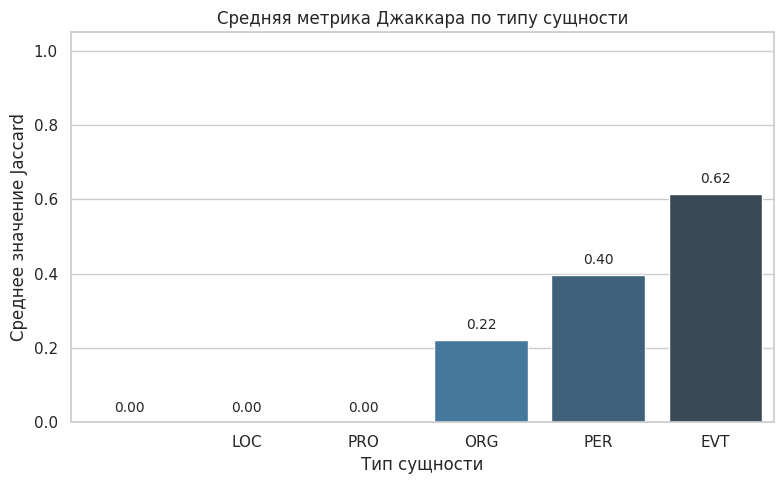

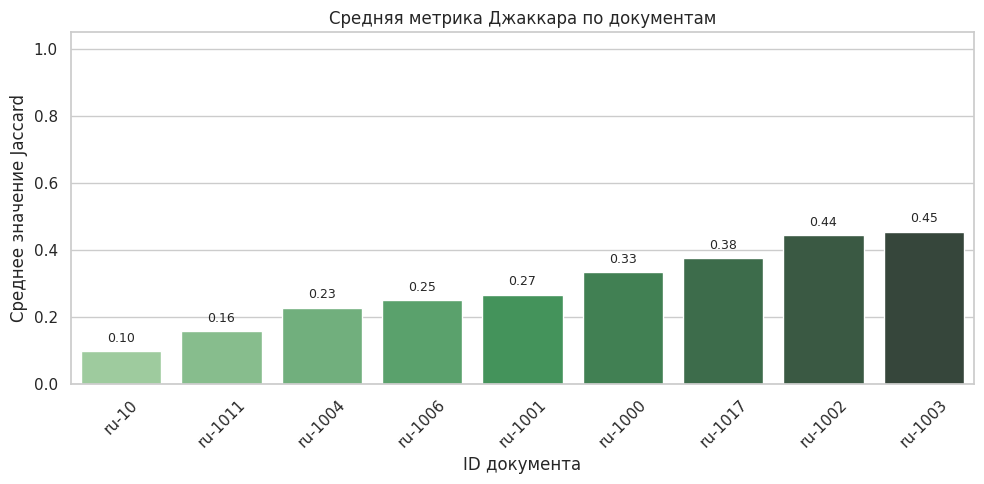

In [184]:
# по типу сущности

entity_scores = merged.groupby('entity_gold')['jaccard_score'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")
ax = sns.barplot(x=entity_scores.index, y=entity_scores.values, palette="Blues_d")


for i, value in enumerate(entity_scores.values):
    ax.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Средняя метрика Джаккара по типу сущности")
plt.xlabel("Тип сущности")
plt.ylabel("Среднее значение Jaccard")
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()


# по документу

doc_scores = merged.groupby('document_id')['jaccard_score'].mean().sort_values()

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=doc_scores.index, y=doc_scores.values, palette="Greens_d")

for i, value in enumerate(doc_scores.values):
    ax.text(i, value + 0.02, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

plt.title("Средняя метрика Джаккара по документам")
plt.xlabel("ID документа")
plt.ylabel("Среднее значение Jaccard")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Из графиков видно, что GigaChat хуже всего справился с нахождением сущностей типа локация и продукт (0% совпадений), и лучше всего - с личностями и событиями (40 и 62% совпадений соответственно). Также можно заметить, что качество модели по документам неодинаково. Это скорее всего связано с тем, что модель при запросе не учитывала повторяющиеся упоминания, таким образом составляя уникальное множество вместо того чтоб воспринимать каждое упоминание как отдельную сущность.

Что касается 0% точности с локациями это так же может быть связано с тем, что канонические наименования модель формулировала по-другому - например United Kingdom вместо эталонного Great Britain

In [197]:
#подсчет числа одинаковых сущностей в документах

counts = df.groupby(['document_id', 'gold_answer']).size().reset_index(name='count')
duplicates = counts[counts['count'] > 1].groupby('document_id')['count'].sum()
duplicates

,count
document_id,
ru-10,36
ru-1000,4
ru-1001,11
ru-1002,2
ru-1003,4
ru-1004,11
ru-1006,10
ru-1011,15
ru-1017,5


In [205]:
df[df['entity']=='LOC'].head(10)

,document_id,document_text,entity,gold_answer,_group_idx
5,ru-1011,Комментируя отставку министра иностранных дел ...,LOC,GPE-Great-Britain,0
6,ru-1011,Комментируя отставку министра иностранных дел ...,LOC,GPE-Great-Britain,1
20,ru-1002,Премьер-министр Великобритании Тереза Мей прин...,LOC,GPE-Great-Britain,0
31,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,LOC,GPE-Great-Britain,0
35,ru-1017,КИЕВ. 9 июля. УНН. Борис Джонсон подал в отста...,LOC,GPE-Kiev,1
44,ru-1006,Официальный представитель МИД России Мария Зах...,LOC,GPE-Great-Britain,0
45,ru-1006,Официальный представитель МИД России Мария Зах...,LOC,GPE-Great-Britain,1
55,ru-1004,Глава МИД Великобритании Борис Джонсон ушел в ...,LOC,GPE-Germany,0
62,ru-1004,Глава МИД Великобритании Борис Джонсон ушел в ...,LOC,LOC-Balkans,1
64,ru-1004,Глава МИД Великобритании Борис Джонсон ушел в ...,LOC,GPE-London,2


In [203]:
df_giga[df_giga['entity']=='LOC'].head(10)

,document_id,entity,giga_chat_pred,_group_idx
5,ru-1006,LOC,LOC-United-Kingdom,0
11,ru-1002,LOC,LOC-United-Kingdom,0
17,ru-1004,LOC,LOC-United-Kingdom,0
18,ru-1004,LOC,LOC-Germany,1
19,ru-1004,LOC,LOC-Poland,2
20,ru-1004,LOC,LOC-Western-Balkans,3
27,ru-1000,LOC,LOC-United-Kingdom,0
32,ru-10,LOC,LOC-United-Kingdom,0
33,ru-10,LOC,LOC-Northern-Ireland,1
34,ru-10,LOC,LOC-Albion,2


# **Задание 7**
> Есть ли зависимость метрик от длины документа?  
> Постройте графики, чтобы ответить на вопрос.


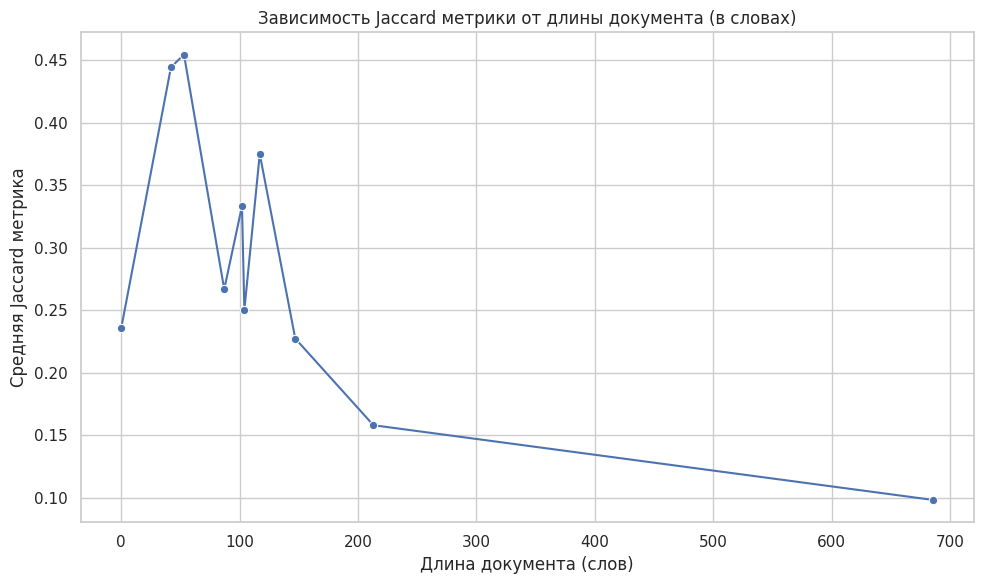

In [206]:
# добавим колонку с длиной документа (в словах)
doc_lengths = merged[['document_id', 'document_text']].drop_duplicates()
doc_lengths['doc_length_words'] = doc_lengths['document_text'].str.split().apply(len)

merged = merged.merge(doc_lengths[['document_id', 'doc_length_words']], on='document_id', how='left')

length_vs_score = merged.groupby('doc_length_words')['jaccard_score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=length_vs_score, x='doc_length_words', y='jaccard_score', marker='o')
plt.title("Зависимость Jaccard метрики от длины документа (в словах)")
plt.xlabel("Длина документа (слов)")
plt.ylabel("Средняя Jaccard метрика")
plt.grid(True)
plt.tight_layout()
plt.show()

Есть. модель хуже выделяет сущности на длинных текстах, при чем на больших документах качество критично низкое.

# **Задание 8**  
> Проведите анализ ошибок. Когда модель чаще отвечает правильно, а когда ошибается?  
> Предложите варианты, как повысить метрики.
---
Подытоживая предыдущие комментарии, модель чаще всего ошибается на длинных текстах и в названиях локаций и продуктов. Первое связано с различием в формулировках, а второе вероятно с тем, что продукты в речи не участвуют как имена собственные, а как имена нарицательные из-за чего их сложнее выделить как сущность.

Возможные способы повышения метрик:
* включение внешних баз затруднительных сущностей в запрос, чтоб модель могла сопоставлять с ними (например список сокращений гео-локаций, соцсетей)
* дополнить трейновый сет специфичными примерами, чтоб модель дообучалась на длинных документах
* дообучение на сложных примерах, на который уже известно низкое значение метрики


#**Задание 9**
> Сделайте выводы по всему исследованию. Напишите, чему научились и что нового попробовали.

---

В результате исследования я лучше поняла, как работает задача извлечения именованных сущностей и с какими сложностями сталкиваются языковые модели при её выполнении. Также интересным было практическое сопоставление предсказанных сущностей с эталонными, подбор и анализ метрик.

Также я научилась лучше формулировать промпты для генеративных моделей, поняла, насколько важно чётко и конкретно задавать инструкцию.

Что касается результатов эксперимента - видно, что gigachat справляется с задачей NER хуже, чем хотелось бы. Особенно заметны проблемы при распознавании сущностей типа "продукт" (бренды, соцсети, медиа), а также на длинных и насыщенных текстах. Кроме того, в ответах Gigachat наблюдается высокая вариативность, при незначительных изменениях в формулировке промпта модель по-разному интерпретировала требования, иногда упуская важные детали. Это затрудняет стабильное извлечение сущностей.

Тем не менее, исследование позволило мне глубже погрузиться в устройство языковых моделей, а также научиться применять методы анализа качества предсказаний.

ссылка на чат с ответами модели
https://giga.chat/link/gcsOzMEeMv